In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

df = pd.read_csv('pdb_data_no_dups.csv' , index_col=  False) 
#list of dropped columns 
list_drop = ['structureId' , 'crystallizationMethod' , 'crystallizationTempK' , 'pdbxDetails' , 'publicationYear']
#drop the columns from the Dataset 
df.drop(list_drop ,  axis=1 , inplace=True)
#Encoding the sequence Columns
encoded_columns = pd.get_dummies(df , columns=['classification' ,'experimentalTechnique' , 'macromoleculeType' ])
#overriding the new dataset
df = df.join(encoded_columns , how = 'left' , lsuffix='left' , rsuffix='right').drop(['classification' ,'experimentalTechnique' , 'macromoleculeType'] , axis = 1)

#reseting the dataset


df.head(2)


Saving pdb_data_no_dups.csv to pdb_data_no_dups.csv


,residueCountleft,resolutionleft,structureMolecularWeightleft,densityMatthewsleft,densityPercentSolleft,phValueleft,residueCountright,resolutionright,structureMolecularWeightright,densityMatthewsright,...,macromoleculeType_DNA/RNA Hybrid,macromoleculeType_Protein,macromoleculeType_Protein#DNA,macromoleculeType_Protein#DNA#DNA/RNA Hybrid,macromoleculeType_Protein#DNA#RNA,macromoleculeType_Protein#DNA/RNA Hybrid,macromoleculeType_Protein#RNA,macromoleculeType_Protein#RNA#DNA/RNA Hybrid,macromoleculeType_RNA,macromoleculeType_RNA#DNA/RNA Hybrid
0,20,1.90,6360.30,1.78,30.89,7.0,20,1.90,6360.30,1.78,...,1,0,0,0,0,0,0,0,0,0
1,24,2.25,7939.35,2.00,38.45,NaN,24,2.25,7939.35,2.00,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.reset_index()
df.head()

,index,residueCountleft,resolutionleft,structureMolecularWeightleft,densityMatthewsleft,densityPercentSolleft,phValueleft,residueCountright,resolutionright,structureMolecularWeightright,...,macromoleculeType_DNA/RNA Hybrid,macromoleculeType_Protein,macromoleculeType_Protein#DNA,macromoleculeType_Protein#DNA#DNA/RNA Hybrid,macromoleculeType_Protein#DNA#RNA,macromoleculeType_Protein#DNA/RNA Hybrid,macromoleculeType_Protein#RNA,macromoleculeType_Protein#RNA#DNA/RNA Hybrid,macromoleculeType_RNA,macromoleculeType_RNA#DNA/RNA Hybrid
0,0,20,1.90,6360.30,1.78,30.89,7.0,20,1.90,6360.30,...,1,0,0,0,0,0,0,0,0,0
1,1,24,2.25,7939.35,2.00,38.45,NaN,24,2.25,7939.35,...,0,0,0,0,0,0,0,0,0,0
2,2,154,2.07,18112.80,3.09,60.20,9.0,154,2.07,18112.80,...,0,1,0,0,0,0,0,0,0,0
3,3,24,2.20,7637.17,2.28,46.06,7.0,24,2.20,7637.17,...,0,0,0,0,0,0,0,0,0,0
4,4,165,1.74,18926.61,2.75,55.28,NaN,165,1.74,18926.61,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,index,residueCountleft,resolutionleft,structureMolecularWeightleft,densityMatthewsleft,densityPercentSolleft,phValueleft,residueCountright,resolutionright,structureMolecularWeightright,...,macromoleculeType_DNA/RNA Hybrid,macromoleculeType_Protein,macromoleculeType_Protein#DNA,macromoleculeType_Protein#DNA#DNA/RNA Hybrid,macromoleculeType_Protein#DNA#RNA,macromoleculeType_Protein#DNA/RNA Hybrid,macromoleculeType_Protein#RNA,macromoleculeType_Protein#RNA#DNA/RNA Hybrid,macromoleculeType_RNA,macromoleculeType_RNA#DNA/RNA Hybrid
count,141401.000000,141401.000000,128589.000000,1.414010e+05,124724.000000,124749.000000,105110.000000,141401.000000,128589.000000,1.414010e+05,...,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000,141401.000000
mean,70700.000000,825.374849,2.263807,1.120790e+05,2.670267,51.353163,6.788685,825.374849,2.263807,1.120790e+05,...,0.000410,0.903798,0.029533,0.000240,0.001768,0.000134,0.015290,0.000064,0.009158,0.000191
std,40819.097044,2136.461080,1.410878,5.690152e+05,0.783740,10.104561,2.556819,2136.461080,1.410878,5.690152e+05,...,0.020249,0.294869,0.169296,0.015505,0.042011,0.011591,0.122704,0.007978,0.095260,0.013817
min,0.000000,0.000000,0.480000,3.143800e+02,0.000000,0.000000,0.000000,0.000000,0.480000,3.143800e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35350.000000,226.000000,1.800000,2.612856e+04,2.210000,44.370000,6.000000,226.000000,1.800000,2.612856e+04,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70700.000000,414.000000,2.100000,4.747779e+04,2.490000,50.500000,7.000000,414.000000,2.100000,4.747779e+04,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,106050.000000,820.000000,2.500000,9.408484e+04,2.910000,57.710000,7.500000,820.000000,2.500000,9.408484e+04,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,141400.000000,313236.000000,70.000000,9.773054e+07,99.000000,92.000000,724.000000,313236.000000,70.000000,9.773054e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dropna(inplace=True)
df.head()

,index,residueCountleft,resolutionleft,structureMolecularWeightleft,densityMatthewsleft,densityPercentSolleft,phValueleft,residueCountright,resolutionright,structureMolecularWeightright,...,macromoleculeType_DNA/RNA Hybrid,macromoleculeType_Protein,macromoleculeType_Protein#DNA,macromoleculeType_Protein#DNA#DNA/RNA Hybrid,macromoleculeType_Protein#DNA#RNA,macromoleculeType_Protein#DNA/RNA Hybrid,macromoleculeType_Protein#RNA,macromoleculeType_Protein#RNA#DNA/RNA Hybrid,macromoleculeType_RNA,macromoleculeType_RNA#DNA/RNA Hybrid
0,0,20,1.90,6360.30,1.78,30.89,7.0,20,1.90,6360.30,...,1,0,0,0,0,0,0,0,0,0
2,2,154,2.07,18112.80,3.09,60.20,9.0,154,2.07,18112.80,...,0,1,0,0,0,0,0,0,0,0
3,3,24,2.20,7637.17,2.28,46.06,7.0,24,2.20,7637.17,...,0,0,0,0,0,0,0,0,0,0
5,5,154,1.84,18010.64,3.09,60.20,9.0,154,1.84,18010.64,...,0,1,0,0,0,0,0,0,0,0
8,8,154,2.07,18093.78,3.09,60.30,9.0,154,2.07,18093.78,...,0,1,0,0,0,0,0,0,0,0


<Axes: ylabel='count'>

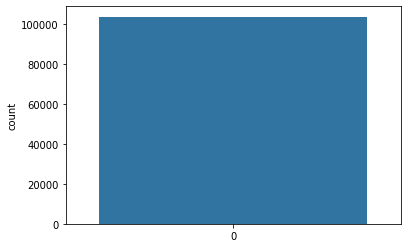

In [7]:
#stoped here 
#Visualize the count
sns.countplot(df['residueCountleft'] , label = 'resolutionleft')

In [8]:
#Get the correlation of the columns 
df.iloc[:,1 : 30].corr()

,residueCountleft,resolutionleft,structureMolecularWeightleft,densityMatthewsleft,densityPercentSolleft,phValueleft,residueCountright,resolutionright,structureMolecularWeightright,densityMatthewsright,...,classification_ACETYLATION AND ACTIN-BINDING,classification_ACETYLCHOLINE BINDING PROTEIN,classification_ACETYLCHOLINE RECEPTOR,classification_ACETYLCHOLINE RECEPTOR ANTAGONIST,classification_ACETYLCHOLINE-BINDING PROTEIN,classification_ACETYLTRANSFERASE,classification_ACID ANHYDRIDE HYDROLASE,classification_ACID PROTEASE,classification_ACTIN BINDING,classification_ACTIN BINDING PEPTIDE
residueCountleft,1.000000,0.312268,0.594162,0.142387,0.178420,0.011357,1.000000,0.312268,0.594162,0.142387,...,NaN,0.003806,NaN,-0.002228,0.010425,-0.001934,NaN,NaN,NaN,NaN
resolutionleft,0.312268,1.000000,0.182187,0.417700,0.466768,0.025449,0.312268,1.000000,0.182187,0.417700,...,NaN,0.001870,NaN,-0.008020,0.004394,0.007198,NaN,NaN,NaN,NaN
structureMolecularWeightleft,0.594162,0.182187,1.000000,0.081583,0.098908,0.007928,0.594162,0.182187,1.000000,0.081583,...,NaN,0.001397,NaN,-0.001004,0.004078,-0.000898,NaN,NaN,NaN,NaN
densityMatthewsleft,0.142387,0.417700,0.081583,1.000000,0.793451,0.013243,0.142387,0.417700,0.081583,1.000000,...,NaN,0.000034,NaN,-0.005873,-0.001458,0.017724,NaN,NaN,NaN,NaN
densityPercentSolleft,0.178420,0.466768,0.098908,0.793451,1.000000,0.016410,0.178420,0.466768,0.098908,0.793451,...,NaN,0.002235,NaN,-0.011920,0.000464,0.008739,NaN,NaN,NaN,NaN
phValueleft,0.011357,0.025449,0.007928,0.013243,0.016410,1.000000,0.011357,0.025449,0.007928,0.013243,...,NaN,0.000626,NaN,-0.000065,0.000873,0.002954,NaN,NaN,NaN,NaN
residueCountright,1.000000,0.312268,0.594162,0.142387,0.178420,0.011357,1.000000,0.312268,0.594162,0.142387,...,NaN,0.003806,NaN,-0.002228,0.010425,-0.001934,NaN,NaN,NaN,NaN
resolutionright,0.312268,1.000000,0.182187,0.417700,0.466768,0.025449,0.312268,1.000000,0.182187,0.417700,...,NaN,0.001870,NaN,-0.008020,0.004394,0.007198,NaN,NaN,NaN,NaN
structureMolecularWeightright,0.594162,0.182187,1.000000,0.081583,0.098908,0.007928,0.594162,0.182187,1.000000,0.081583,...,NaN,0.001397,NaN,-0.001004,0.004078,-0.000898,NaN,NaN,NaN,NaN
densityMatthewsright,0.142387,0.417700,0.081583,1.000000,0.793451,0.013243,0.142387,0.417700,0.081583,1.000000,...,NaN,0.000034,NaN,-0.005873,-0.001458,0.017724,NaN,NaN,NaN,NaN


<Axes: >

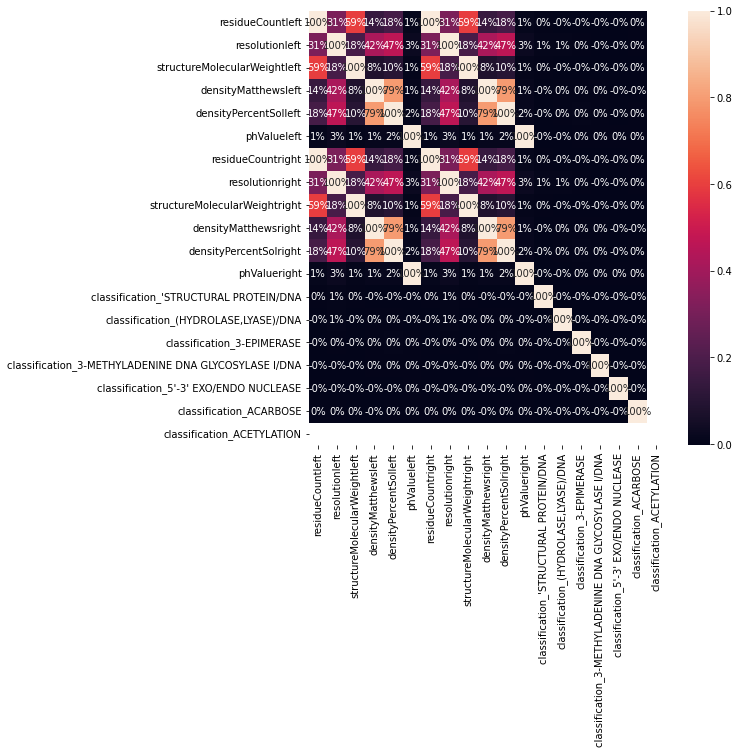

In [9]:
#Visualize the correlation 
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1 : 20].corr() , annot = True , fmt = '.0%' )

In [10]:
#Split the data to dependant(X) , and independant data cells(Y) 
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [11]:
#Split the data to 25% testing and 75% training 
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,test_size = 0.25 , random_state = 0)

In [12]:
#Scale the data -  Feature scaling  
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
def models(X_train,Y_train):

   #Logistic regression
  from sklearn.linear_model import LogisticRegression 
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)


  #Random Estimators 
  from sklearn.ensemble import RandomForestRegressor
  forest = RandomForestRegressor(n_estimators = 10 , random_state=0)
  forest.fit(X_train,Y_train) 

  ##Decesion Tree 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy' , random_state=0)
  tree.fit(X_train,Y_train) 
  
  print('[0] Logisitc regresson accuracy is' , log.score(X_train,Y_train) * 100)
  print('[2] Random forest accuracy is ' ,forest.score(X_train,Y_train) * 100) 
  print('[1] Decesion tree accuracy is ' , tree.score(X_train,Y_train) * 100)
  
  return log, forest , tree 



In [14]:

model = models(X_train,Y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0] Logisitc regresson accuracy is 3.4861416856550678
[2] Random forest accuracy is  99.92484299706749
[1] Decesion tree accuracy is  100.0
